# pyaudio를 이용한 오디오 녹음

In [1]:
%matplotlib inline
import pyaudio
import wave
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,20)
CHUNK = 512
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 10
WAVE_OUTPUT_FILENAME = "voice.wav"
p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')
for i in range(0, numdevices):
        if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
            print ("Input Device id ",i, " - ", p.get_device_info_by_host_api_device_index(0, i).get('name'))

Input Device id  0  -  Microsoft Sound Mapper - Input
Input Device id  1  -  마이크 배열(Synaptics Audio)


* recording
* done recording


Text(0.5, 0, 'Time (s)')

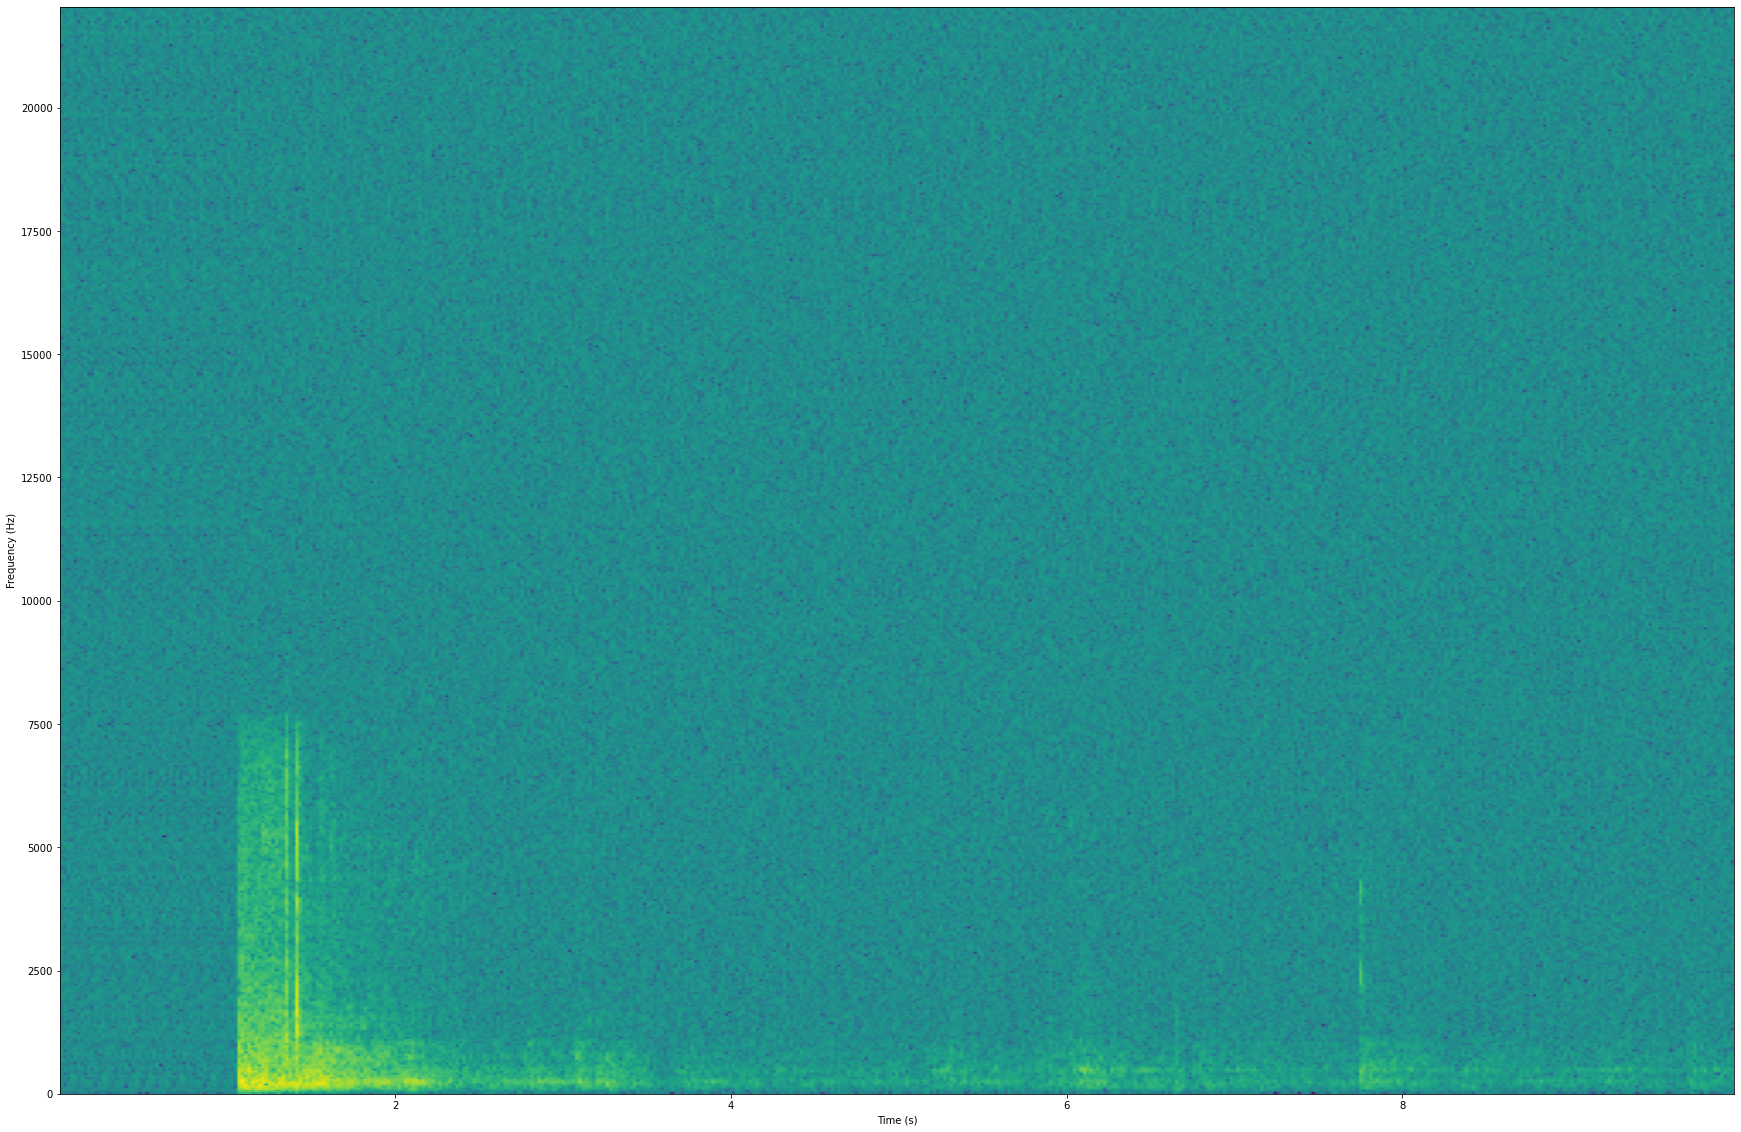

In [2]:
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                input_device_index=1, #input device 넘버, 위 코드의 print 출력에서 고르기
                frames_per_buffer=CHUNK)

print("* recording")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

from scipy.io import wavfile

rate, snd = wavfile.read(filename='voice.wav')

from IPython.display import Audio

Audio(data=snd, rate=rate)

_ = plt.specgram(snd, NFFT=1024, Fs=44100)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

In [39]:
import winsound
winsound.PlaySound("voice.wav", winsound.SND_FILENAME)